### Dataset

In this project we will create a data set simulating a real world phenomenon. As for a long time in my professional life I was part of the commercial area, so I chose to create hypothetical products and their respective variables for those who know how to predict a possible monthly revenue.

As variables we will basically need:

- the product itself - data such as names and may contain models
- quantity - integer data
- price - data of decimal numbers
- date - simulation of the date they were sold

### Import Libraries

We will start by reserving a cell to import all the libraries we will need in this project.

In [59]:
import pandas as pd
import numpy as np
import random as rd
import datetime
from datetime import timedelta
from datetime import date

To guide this sample of the best selling brands I used as a guide a survey on the website "Best Selling Cars" [1] 

To generate car brands and real prices, a sample of the data set referred to was used.[2]

To build a data set I initially included the data in a list-like variable and then transformed it into a dictionary to find the "key: value" pair.

Unlike lists in which elements are accessed through a position or index, in dictionaries, information is accessed using keys. The elements of a dictionary are stored in an unordered manner. They use a pair structure containing key and value "{key:value}", so that their elements are unique, although the elements of a value can be duplicated since the key is different. For that, I used the dict () constructor to create dictionaries directly from strings of key-value pairs, as shown in the example below. [3] 

In [60]:
# Creating a list with tuples inside to simulate a pair of values, as the dictionary requires.
l1 = [("banana", 81),("orange", 84)]

# Transforming the list into a dictionary
l2 = dict(l1) 

print(l2)

{'banana': 81, 'orange': 84}


After the main variables defined I created an empty data set to guide the columns (variables) that I would work on. For that I used the Pandas library. [4] 

Finally I started my loop to include information on 100 rows of the data set. First I started by including the keys to my dictionary in the "Products" column and then, to track each key, its respective values in the "Price" column. I used the random.choice() function for this. [5] 

After that I needed to include random dates to simulate the purchase date of each vehicle. I called the random_time function to create such a scenario. I first used a date.today () date class to start counting in a global variable "start_dt", replacing the day and month since January 2020 and turning the date into an ordinal number through date.toordinal [6], as the idea was to create the scenario for the entire year. [7]. The same thought I did for the final count included in the variable "end_dt".

The variable random_day that randomly chooses a date between ordinal numbers of start and end (January 2020 until December 2020) and then turns them back into date through date.fromordinal() [8], needed to be inside a loop for the 100 lines to be chosen.

In [106]:
# First we choose the columns (variables)
columns = ['Product', 'Price', 'Quantity Ordered', 'Date']
# a list of cars has been included to represent the products
products = ['chevrolet', 'dodge', 'honda', 'isuzu', 'mitsubishi', 'toyota', 'volkswagen', 'nissan', 'mazda', 'peugot', 'alfa-romero', 'audi', 'volvo', 'bmw', 'porsche', 'mercedes-benz', 'jaguar']
# a list of prices has been included to represent each car brand
prices = [6007, 7875, 8184, 8916, 9239, 9885, 10077, 10415, 10652, 15489, 15498, 17859, 18063, 26118, 31400, 33647, 34600]
# a dictionary was generated so that the car brand key matches the price of the car
prod_pri = dict(zip(products, prices))

# to create a empty Data set
df = pd.DataFrame(columns=columns)
df

start_dt = date.today().replace(day=1, month=1).toordinal() # I change the date into an ordinal number and limit it to month 1, as the initial value
end_dt = date.today().replace(day=1, month=12).toordinal() # I change the date into an ordinal number and limit it to month 12, as larger value.


# This function randomly chooses dates from January 1, 2020 to December 2020
def random_time():
    global random_day
    random_day = date.fromordinal(rd.randint(start_dt, end_dt)) # through the ordinal values above it is possible to put a scale for the randint function and then turn the number into a date again
    return random_day
    

# This function randomly chooses numbers within a normal distribution (to simulate sales seasonality)
def random_price():
    month = random_day.month
    month_list = []
    month_list.append(month)
    for x in month_list:
        if x <= 3:
            orders = int(np.random.normal(loc=10, scale=10))
            if orders < 0:
                orders *= (-1)
                continue
                
        elif x <= 9:
            orders = int(np.random.normal(loc=50, scale=10))
            if orders < 0:
                orders *= (-1)
                continue
        else:
            orders = int(np.random.normal(loc=100, scale=10))
            if orders < 0:
                orders *= (-1)
                continue
   
    return orders
    
               
# Here we will randomly choose the products and their respective prices, the date and the orders (100 times) to be included in the data set
for i in range (100):
    product = rd.choice(list(prod_pri.keys())) # select products randomly from the prod_pri dictionary
    price = prod_pri[product] # selects the respective car prices
    date = random_time() # calls the function to randomly chooses dates
    orders = random_price()
    df.loc[i] = [product, price, orders, date]



# Saving the generated file
df.to_csv('data_project_pda.csv')

In [107]:
import matplotlib.pyplot as fig
import matplotlib.ticker as ticker

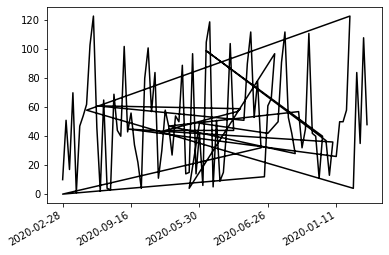

In [109]:
df = pd.read_csv('data_project_pda.csv')
ax = fig.subplot(111)
ax.plot(df['Date'], df['Quantity Ordered'], '-k')
fig.gcf().autofmt_xdate()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

### References

[1] https://www.best-selling-cars.com/europe/2019-full-year-europe-best-selling-car-manufacturers-and-brands/#:~:text=Volkswagen%2C%20Renault%2C%20Ford%20and%20Peugeot,to%2015%2C805%2C752%20cars%20in%202019.

[2] https://archive.ics.uci.edu/ml/datasets/automobile

[3] Data Structures;https://docs.python.org/3/tutorial/datastructures.html

[4] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

[5] https://docs.python.org/3/library/random.html

[6] https://pythontic.com/datetime/date/toordinal

[7] https://www.guru99.com/date-time-and-datetime-classes-in-python.html

[8] https://pythontic.com/datetime/date/fromordinal

[9] 